In [1]:
# extra libraries for gis plotting
import geoviews as gv
import hvplot.pandas
import hvplot.xarray
import geopandas as gpd

# standard libraries
import numpy as np
import matplotlib.pyplot as plt
import pyodbc
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)

# databaseConnection = 'DRIVER={SQL Server}; SERVER=ServerName; Database=DatbaseName; UID=UserId; PWD=password;'
connection = pyodbc.connect('DRIVER={SQL Server};SERVER=WINDOWS-A6S01I2\SQLEXPRESS;DATABASE=City_of_Scottsdale;Trusted_Connection=yes;')
cursor = connection.cursor()

# SQL query to import all citation data
code_violations_query = ''' select * from [City_of_Scottsdale].[dbo].[np_CodeViolations] '''

code_violations = pd.read_sql(code_violations_query, connection)
connection.close()

# convert latitude and longitude attributes to numeric from object
# can I combine both of the below lines of code into one?
code_violations['_Latitude_'] = pd.to_numeric(code_violations['_Latitude_'], errors="coerce")
code_violations['_Longitude_'] = pd.to_numeric(code_violations['_Longitude_'], errors="coerce")

code_violations.head()

,_ViolationID_,_ComplaintID_,_DateComplaintReceived_,_DateComplaintClosed_,_ComplaintStatus_,_ViolationCategory_,_ViolationCode_,_StreetNumber_,_StreetDirection_,_StreetName_,_StreetType_,_SuiteApt_,_UnitNumber_,_ZipCode_,_ParcelCode_,_Subdivision_,_LotNumber_,_Latitude_,_Longitude_
0,345175,238737,2014-01-21 09:46:48.483000000,2018-07-20 08:28:22.257000000,CLOSED-NOV ISSUED,Zoning-Administration and Procedures,1.1101,9514,E,MARIPOSA GRANDE,DR,,,85255,217-05-006B,,,33.704477,-111.875734
1,345176,238737,2014-01-21 09:46:48.483000000,2018-07-20 08:28:22.257000000,CLOSED-NOV ISSUED,Zoning-Article VI SUPPLEMENTARY DISTRICTS: Sec...,6.1060.A.1,9514,E,MARIPOSA GRANDE,DR,,,85255,217-05-006B,,,33.704477,-111.875734
2,345177,238737,2014-01-21 09:46:48.483000000,2018-07-20 08:28:22.257000000,CLOSED-NOV ISSUED,Zoning-Native Plant Program,7.501.1.b,9514,E,MARIPOSA GRANDE,DR,,,85255,217-05-006B,,,33.704477,-111.875734
3,355908,247116,2014-08-11 09:54:15.710000000,2019-04-09 15:38:13.367000000,CLOSED-NOV ISSUED,Zoning-Uses Permitted Residential,3.100,8144,E,VIA DONA,RD,,,85266,216-70-005T,,,33.749464,-111.904722
4,356293,247116,2014-08-11 09:54:15.710000000,2019-04-09 15:38:13.367000000,CLOSED-NOV ISSUED,Zoning-Uses Permitted Residential,5.012(A)(R1-190),8144,E,VIA DONA,RD,,,85266,216-70-005T,,,33.749464,-111.904722


In [2]:
code_violations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16449 entries, 0 to 16448
Data columns (total 19 columns):
_ViolationID_              16449 non-null object
_ComplaintID_              16449 non-null object
_DateComplaintReceived_    16449 non-null object
_DateComplaintClosed_      16449 non-null object
_ComplaintStatus_          16449 non-null object
_ViolationCategory_        16449 non-null object
_ViolationCode_            16449 non-null object
_StreetNumber_             16449 non-null object
_StreetDirection_          16449 non-null object
_StreetName_               16449 non-null object
_StreetType_               16449 non-null object
_SuiteApt_                 16449 non-null object
_UnitNumber_               16449 non-null object
_ZipCode_                  16449 non-null object
_ParcelCode_               16449 non-null object
_Subdivision_              16449 non-null object
_LotNumber_                16449 non-null object
_Latitude_                 16449 non-null float64
_Longitu

Text(0.5, 0, 'Latitude')

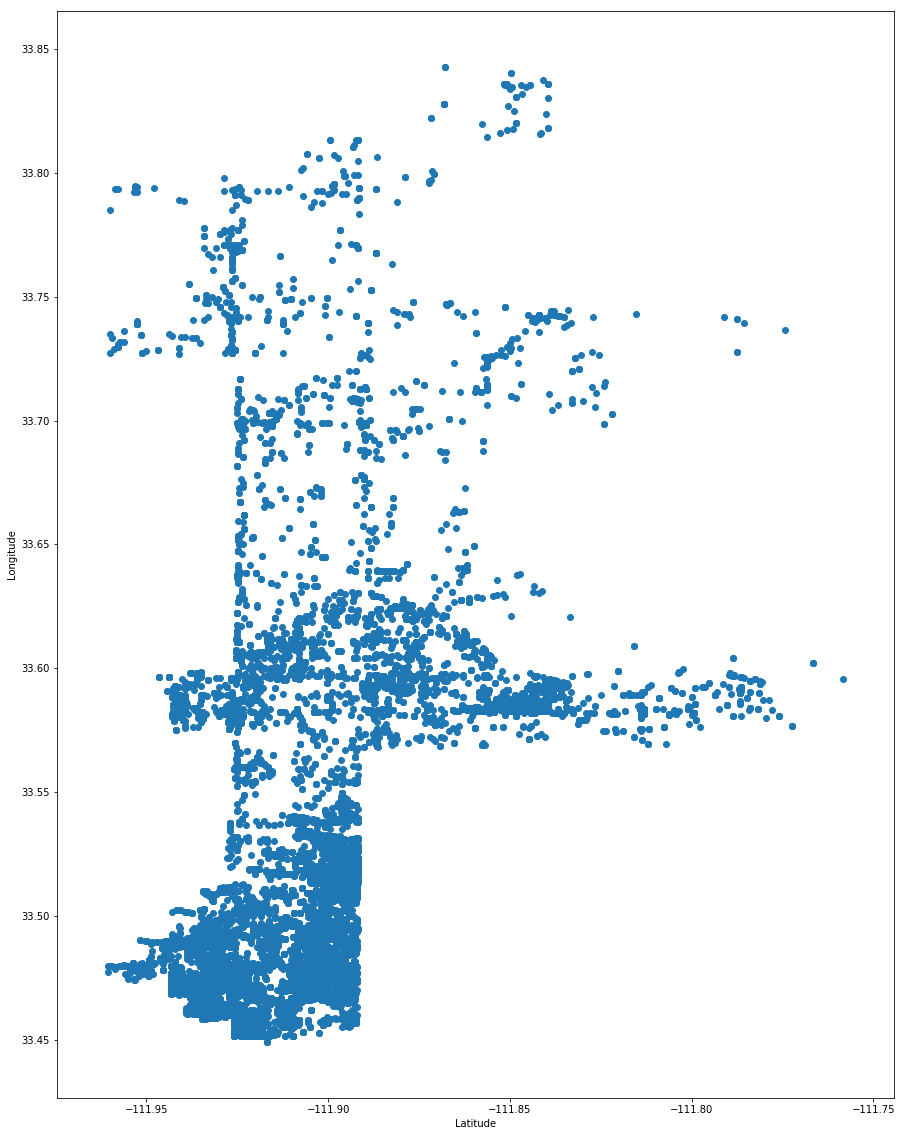

In [3]:
plt.rcParams["figure.figsize"] = [15, 20]

plt.scatter(x=code_violations['_Longitude_'], y=code_violations['_Latitude_'])
plt.ylabel("Longitude")
plt.xlabel("Latitude")

In [4]:
gv.tile_sources.ESRI * code_violations.hvplot.points(
    '_Longitude_', '_Latitude_', geo=True, height=650)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [_Longitude_,_Latitude_]

In [5]:
points = gv.Points(code_violations, ['_Longitude_', '_Latitude_'])
(gv.tile_sources.Wikipedia * points).opts(width=650, height=650, tools=['hover'])

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [_Longitude_,_Latitude_]   (_ViolationID_,_ComplaintID_,_DateComplaintReceived_,_DateComplaintClosed_,_ComplaintStatus_,_ViolationCategory_,_ViolationCode_,_StreetNumber_,_StreetDirection_,_StreetName_,_StreetType_,_SuiteApt_,_UnitNumber_,_ZipCode_,_ParcelCode_,_Subdivision_,_LotNumber_)

### Clustering analysis

In [14]:
code_violations.groupby('_ViolationCategory_')['_Latitude_' , '_Longitude_'] \
    .agg(['mean','count']) \
#     .sort_values(by='_Longitude_', ascending=False)

_Latitude_         \
                                                         mean  count   
_ViolationCategory_                                                    
17 - ON STREET VEHICLE PARKING                      33.501472     35   
17-  ON STREET VEHICLE PARKING                      33.491829      9   
18-110 UNIFORM HOUSING CODE SECTION 1001.10 FAU...  33.508864      1   
18-110 UNIFORM HOUSING CODE SECTION 1001.11 HAZ...  33.536614      2   
18-110 UNIFORM HOUSING CODE SECTION 1001.12 INA...  33.593198      1   
18-110 UNIFORM HOUSING CODE SECTION 1001.2 INAD...  33.550853     17   
18-110 UNIFORM HOUSING CODE SECTION 1001.3 STRU...  33.539269     12   
18-110 UNIFORM HOUSING CODE SECTION 1001.4 NUIS...  33.499433      1   
18-110 UNIFORM HOUSING CODE SECTION 1001.5 HAZA...  33.603656      7   
18-110 UNIFORM HOUSING CODE SECTION 1001.6 HAZA...  33.553386      5   
18-110 UNIFORM HOUSING CODE SECTION 1001.7 HAZA...  33.559184      7   
18-110 UNIFORM HOUSING CODE SECTION 1001.8 FAUL...  33.531433     12   
18-12 ADDITIONAL VIOLATIONS                         33.595721      1   
18-5 PUBLIC NUISANCE                                33.543271   2817   
18-6 LITTER CONTROL                                 33.675209      4   
18-7 VEHICLES/ WATERCRAFT                           33.518350    441   
18-8 BUILDINGS/ STRUCTURES/ ACCESSORY IMPROVEMENTS  33.508636    119   
18-9 LAND                                           33.524763  11277   
47-STREETS-SIDEWALKS-PUBLIC WORKS                   33.746686      3   
ARS 33-1902 RENTAL REGISTRATION                     33.568630    128   
Development Review Board                            33.538216     23   
No Violation                                        33.526466    118   
OPEN SPACE (O-S) ZONE                               33.701202     16   
OTHER                                               33.658335      4   
Parking - Applications of and Exemptions from P...  33.553850      2   
Property Development Standards (R1-7)               33.543256     32   
Required Parking Locations                          33.545762      5   
Zoning-Administration and Procedures                33.544394    194   
Zoning-Article I ADMINISTRATION AND PROCEDURES:...  33.644516      5   
Zoning-Article IX Parking and Loading Requireme...  33.620346      1   
Zoning-Article IX Parking and Loading Requireme...  33.702589      2   
Zoning-Article V DISTRICT REGULATIONS: Sec. 5.3...  33.544971      4   
Zoning-Article V District Regulations: Sec. 5.0...  33.617869      4   
Zoning-Article V District Regulations: Sec. 5.1...  33.621933     16   
Zoning-Article V District Regulations: Sec. 5.2...  33.617747     41   
Zoning-Article VI SUPPLEMENTARY DISTRICTS: Sec....  33.747093     26   
Zoning-Article VI SUPPLEMENTARY DISTRICTS: Sec....  33.716011    100   
Zoning-Article VI SUPPLEMENTARY DISTRICTS: Sec....  33.766637      5   
Zoning-Article VI Supplementary Districts: Sec....  33.470204     12   
Zoning-Article VII General Provisions: Sec. 7.104   33.572317      4   
Zoning-Article VII General Provisions: Sec. 7.2...  33.551683     18   
Zoning-Article VII General Provisions: Sec. 7.203   33.619547     39   
Zoning-Article VII General Provisions: Sec. 7.7...  33.521000     15   
Zoning-Article X Landscaping Requirements Sec. ...  33.604335     18   
Zoning-Designated Parking-Front Yards               33.492211    126   
Zoning-Development Review Board Approval            33.530781      2   
Zoning-Lighting Standards                           33.621666     64   
Zoning-Native Plant Program                         33.694395     20   
Zoning-Outdoor Lighting                             33.579554      6   
Zoning-Property Development Standards R1-10         33.588669      2   
Zoning-Property Development Standards R1-7          33.501276     43   
Zoning-Semi-permanent Signs Allowed                 33.652895      8   
Zoning-Sign Requirements                            33.571403    337   
Zoning-Uses Permitt